In [4]:
import numpy as np
import matplotlib.pyplot as plt
from os.path import join


# Glued tree graph

In [5]:
resource_estimation_binary = np.load(join("resource_data", "resource_estimation_glued_tree_binary.npz"))
N_vals_binary = resource_estimation_binary['N_vals_binary']
binary_trotter_steps = resource_estimation_binary['binary_trotter_steps']
binary_two_qubit_gate_count_per_trotter_step = resource_estimation_binary['binary_two_qubit_gate_count_per_trotter_step']

resource_estimation_one_hot = np.load(join("resource_data", "resource_estimation_glued_tree_one_hot.npz"))
N_vals_one_hot = resource_estimation_one_hot["N_vals_one_hot"]
one_hot_trotter_steps = resource_estimation_one_hot['one_hot_trotter_steps']
one_hot_two_qubit_gate_count_per_trotter_step = resource_estimation_one_hot['one_hot_two_qubit_gate_count_per_trotter_step']

Quantum walk on glued tree
Extrapolated curve: f(x) =  0.149 * x ^  2.000


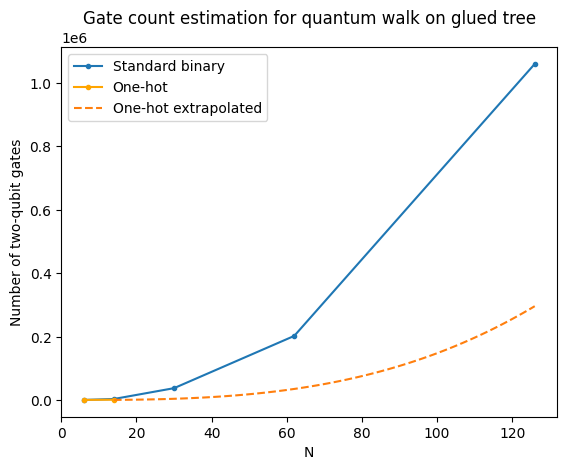

In [6]:
from scipy.optimize import curve_fit

alpha = 2

def func(x, c):
    return c * x ** alpha

c = curve_fit(func, N_vals_one_hot, one_hot_trotter_steps)[0][0]
print(f"Quantum walk on glued tree")
print(f"Extrapolated curve: f(x) = {c: 0.3f} * x ^ {alpha : 0.3f}")

N_vals_one_hot_extrapolated = np.arange(N_vals_one_hot[-1], N_vals_binary[-1]+1)
one_hot_trotter_steps_extrapolated = func(N_vals_one_hot_extrapolated, c)

plt.plot(N_vals_binary, (binary_trotter_steps * binary_two_qubit_gate_count_per_trotter_step), '-o', label="Standard binary", markersize=3)
plt.plot(N_vals_one_hot, one_hot_trotter_steps * one_hot_two_qubit_gate_count_per_trotter_step, '-o', color="orange", label="One-hot", markersize=3)
plt.plot(N_vals_one_hot_extrapolated, one_hot_trotter_steps_extrapolated * (N_vals_one_hot_extrapolated - 1), '--', label="One-hot extrapolated", markersize=1)
plt.legend()
plt.ylabel("Number of two-qubit gates")
plt.xlabel("N")
plt.title("Gate count estimation for quantum walk on glued tree")
plt.savefig(join("figures", "resource_estimation_glued_tree.svg"), bbox_inches='tight')
plt.show()

# Spatial search

In [7]:
resource_estimation_binary = np.load(join("resource_data", "resource_estimation_spatial_search_binary.npz"))
N_vals_binary = resource_estimation_binary['N_vals_binary']
binary_trotter_steps = resource_estimation_binary['binary_trotter_steps']
binary_two_qubit_gate_count_per_trotter_step = resource_estimation_binary['binary_two_qubit_gate_count_per_trotter_step']

resource_estimation_unary = np.load(join("resource_data", "resource_estimation_spatial_search_unary.npz"))
N_vals_unary = resource_estimation_unary["N_vals_unary"]
unary_trotter_steps = resource_estimation_unary['unary_trotter_steps']
unary_two_qubit_gate_count_per_trotter_step = resource_estimation_unary['unary_two_qubit_gate_count_per_trotter_step']

Quantum walk on spatial search
Extrapolated curve: f(x) =  0.487 * x ^  2.500


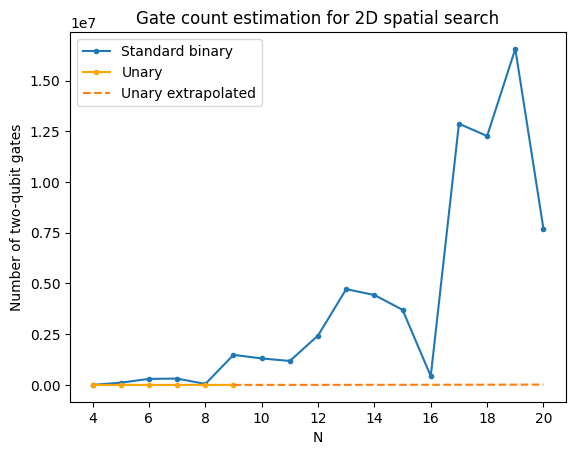

In [8]:
from scipy.optimize import curve_fit

alpha = 2.5

def func(x, c):
    return c * x ** alpha

c = curve_fit(func, N_vals_unary, unary_trotter_steps)[0][0]
print(f"Quantum walk on spatial search")
print(f"Extrapolated curve: f(x) = {c: 0.3f} * x ^ {alpha : 0.3f}")

N_vals_unary_extrapolated = np.arange(N_vals_unary[-1], N_vals_binary[-1]+1)
unary_trotter_steps_extrapolated = func(N_vals_unary_extrapolated, c)

plt.plot(N_vals_binary, (binary_trotter_steps * binary_two_qubit_gate_count_per_trotter_step), '-o', label="Standard binary", markersize=3)
plt.plot(N_vals_unary, unary_trotter_steps * unary_two_qubit_gate_count_per_trotter_step, '-o', color="orange", label="Unary", markersize=3)
plt.plot(N_vals_unary_extrapolated, unary_trotter_steps_extrapolated * (N_vals_unary_extrapolated - 1), '--', label="Unary extrapolated", markersize=1)
plt.legend()
plt.ylabel("Number of two-qubit gates")
plt.xlabel("N")
plt.title("Gate count estimation for 2D spatial search")
plt.savefig(join("figures", "resource_estimation_spatial_search.svg"), bbox_inches='tight')
plt.show()